# Homework 1

## Exercise 1

**What do you need to pay attention to when submitting your homework?**  
One should submit the report and the code. Report should be either html or pdf format. In case of multiple code files, one should zip them.

## Exercise 2-3

### Assignment

1. Find out how to generate random integers/numbers.
2. Figure out how to perform a timing experiment.
3. Measure the time it takes to execute the "calculate_odd_sum" as the size of the input increases.
4. Analyse runtime variability at one fixed dataset size.
5. Create plots showing results of experiments from steps 3 and step 4.

### Solution

In [1]:
from random import randint

def generate_random_list(n: int, left: int, right: int) -> list:
    """
    Generate a list of random integers in range [left, right] of size n
    """
    result = []
    
    for _ in range(n):
        result.append(randint(left, right))
    
    return result

In [2]:
def calculate_odd_sum(series: list) -> int:
    """
    Calculate sum of odd integers within the list
    """
    total_sum = 0
    
    for val in series:
        if val % 2 != 0:
            total_sum += val

    return total_sum

In [3]:
from time import perf_counter as timer

def benchmark(func: object, lengths: list, attempts: int, int_range: (int, int)) -> list:
    """
    Benchmark some function over list.
    func: Some function over list.
    lengths: Sizes of lists to use for experiment.
    attempts: Number of tests for each list size.
    """
    results = []
    left = int_range[0]
    right = int_range[1]
    
    for length in lengths:
        mean_time = 0
        
        for _ in range(attempts):
            cur_list = generate_random_list(length, left, right)
            start = timer()
            func(cur_list)
            end = timer()
            mean_time += (end - start) / attempts
            
        results.append(mean_time)
        
    return results


For each size we run the experiment 5 times and every time we generate a new input list. This is because our goal is to average out different outcomes with the same input list length, so we get the realistic estimation of the running time.


In [4]:
list_lengths = [2 ** i for i in range(25)]
benchmark_times = benchmark(calculate_odd_sum, list_lengths, 5, (-100, 100))
print(benchmark_times)

[7.000000000090266e-07, 6.999999996537555e-07, 1.1800000006445543e-06, 7.399999997659279e-07, 1.160000000055561e-06, 2.119999999905531e-06, 4.420000000138202e-06, 1.167999999971414e-05, 1.538000000067541e-05, 3.066000000018221e-05, 6.097999999958859e-05, 0.0001198999999999728, 0.00024455999999979384, 0.00047882000000001315, 0.0009416599999997998, 0.0018873200000005142, 0.003823520000000258, 0.007563779999999553, 0.01508287999999993, 0.03008676000000001, 0.06020968000000053, 0.12072089999999917, 0.24086383999999939, 0.48254447999999994, 1.0041482200000047]


Now let's fix the size of list $length = 50$ and conduct 50 tests, each time generating a new random list.

In [5]:
fixed_length = 500_000
n_tests = 50
variability_times = []

for _ in range(n_tests):
    variability_times += benchmark(calculate_odd_sum, [fixed_length], 1, (-100, 100))
    
print(variability_times)

[0.029167400000005728, 0.02919510000003811, 0.029365699999971184, 0.029262300000027608, 0.029213499999968917, 0.029209199999968405, 0.029214599999988877, 0.02933589999997821, 0.02929149999999936, 0.02925590000000966, 0.029218700000001263, 0.02920849999998154, 0.029241800000022522, 0.029225199999984852, 0.02906550000000152, 0.029276999999979125, 0.029355499999951462, 0.02926940000003242, 0.02946210000004612, 0.029068699999982073, 0.029476499999987027, 0.02924009999998134, 0.029173200000002453, 0.02919060000004947, 0.02921969999999874, 0.029227199999979803, 0.02924609999996619, 0.02921689999999444, 0.029270699999983663, 0.029443300000025374, 0.029204400000026, 0.029296900000019832, 0.02922140000003992, 0.029321900000013557, 0.02938560000001189, 0.029247099999963666, 0.029219899999986865, 0.029239099999983864, 0.02926949999999806, 0.02913109999997232, 0.029288599999972575, 0.029383999999993193, 0.029590900000016518, 0.02930289999994784, 0.02985119999999597, 0.029382399999974496, 0.0292003

We see that it takes different time for the algorithm to be executed. The primary reason behind this is that the more odd numbers the list has, the more operations are executed.

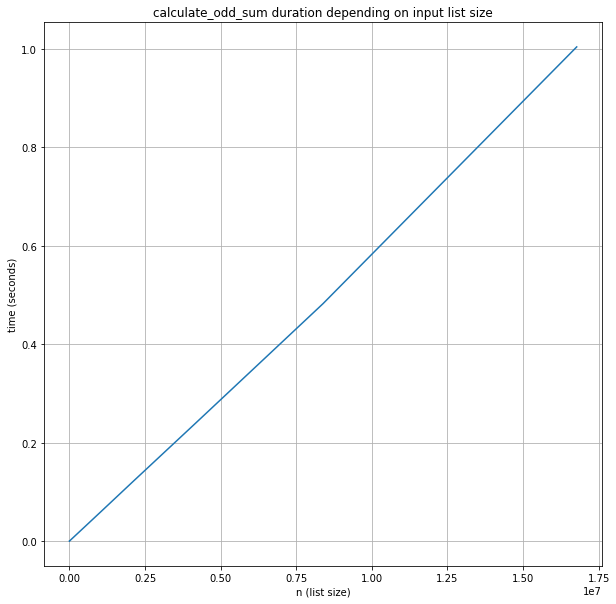

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(list_lengths, benchmark_times)
plt.grid(True)
plt.xlabel('n (list size)')
plt.ylabel('time (seconds)')
plt.title('calculate_odd_sum duration depending on input list size')

plt.show()

For checking the variability, let's create a histogram of taken time. It will show us the number of obesrvations that got into any time interval out of 25 given.

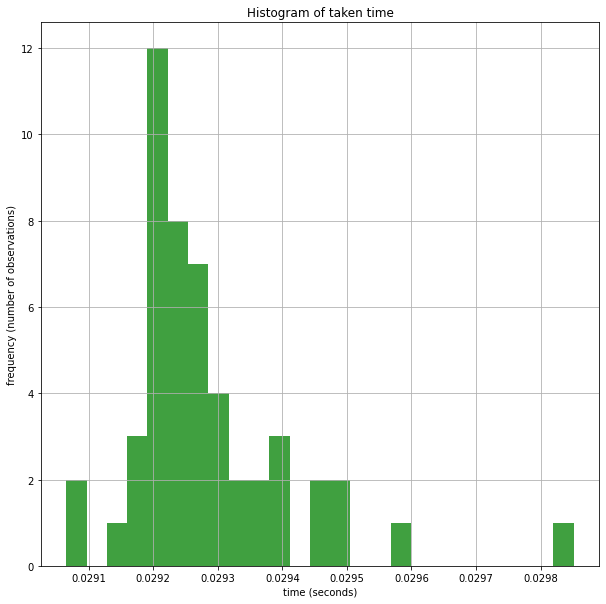

In [9]:
plt.hist(variability_times, 25, facecolor='g', alpha=0.75)


plt.xlabel('time (seconds)')
plt.ylabel('frequency (number of observations)')
plt.title('Histogram of taken time')
plt.grid(True)
plt.show()

### Interpretation of results

In the first plot (the one with duration as depending on input) we clearly see the linear dependency of running time on the list length. It confirms that the algorithm belongs to the O(n) complexity class. The second plot is a histogram of running time for n=500000. We see that results may get to different bins. Ignoring low-level influence, it's primarily because running time is sensitive to random input (the more odd numbers the list has, the more operations are executed).

## Exercise 4

### Assignment

Measure a sorting algorithm that is part of your programming language's standard library. Briefly describe the algorithm and state its computational complexity (you might need to dig a bit of documentation for it). Follow similar steps to analyse the sorting algorithm as you did in EX 2/3 (no need to analyse variability (step 4) this time).

Try to overlay some function T(x) (relation between input array size and output time, e.g. T(x) = 2*x (seconds), where x is input list's length) that would approximate the built-in sort timings well. What T(x) did you choose and how?

Try to measure how many integers (N) can your system roughly sort in 1 minute. If your system cannot handle it, feel free to choose a lower bound time. Predict what would be the sorting time be if you increase N 100 or 1000 times.

### Solution

We will investigate the merge sort from numpy. It is a stable sorting algorithm with a constant time complexity of $\Theta(n * log(n))$. The main idea of this algorithm is splitting the array in halves until the chunks become small enough, then sorting the chunks and eventually merging them.

In [10]:
import numpy as np
from functools import partial

In [11]:
list_lengths = [2 ** i for i in range(25)]
mergesort = partial(np.sort, kind='mergesort')
benchmark_times = benchmark(mergesort, list_lengths, 5, (-100, 100))

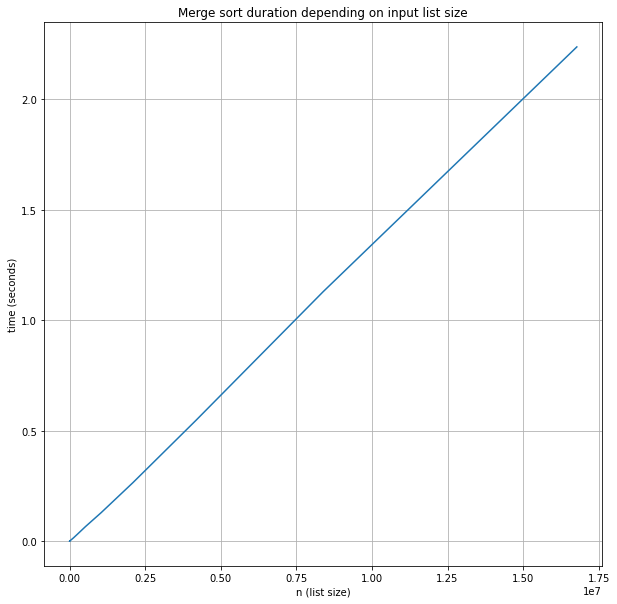

In [12]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(list_lengths, benchmark_times)
plt.grid(True)
plt.xlabel('n (list size)')
plt.ylabel('time (seconds)')
plt.title('Merge sort duration depending on input list size')

plt.show()

Let's also plot the the results in log-scale.

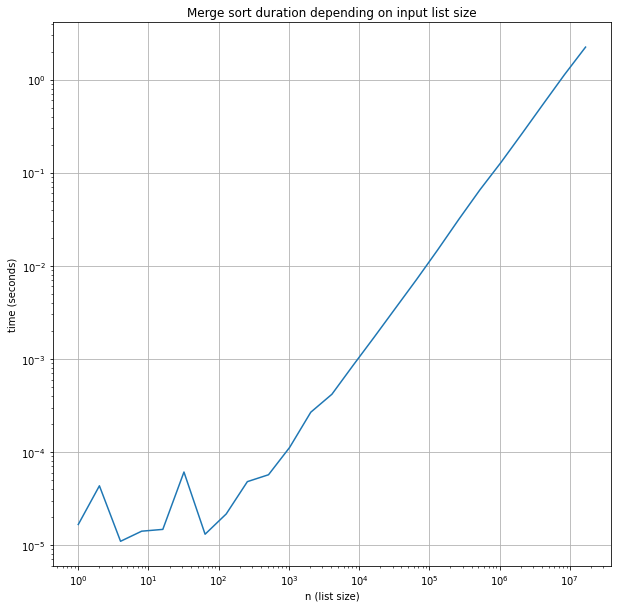

In [13]:
plt.plot(list_lengths, benchmark_times)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (list size)')
plt.ylabel('time (seconds)')
plt.title('Merge sort duration depending on input list size')

plt.show()

Now we see that the algorithm suffers some perturbations on little data (due to overhead of array manipulations), but approximately after n=128 it becomes predictable and has a time complexity of $\Theta(n*log(n))$. Let's choose a function T(n) accordingly: $T(n) = c * n * log(n)$. From the initial plot we see that the approximating function should roughly pass the point (7 500 000, 1). Having substituted the values into the formula and having slightly tuned the result via plotting, we finally prefer $c = 56 * 10^{-10}$.

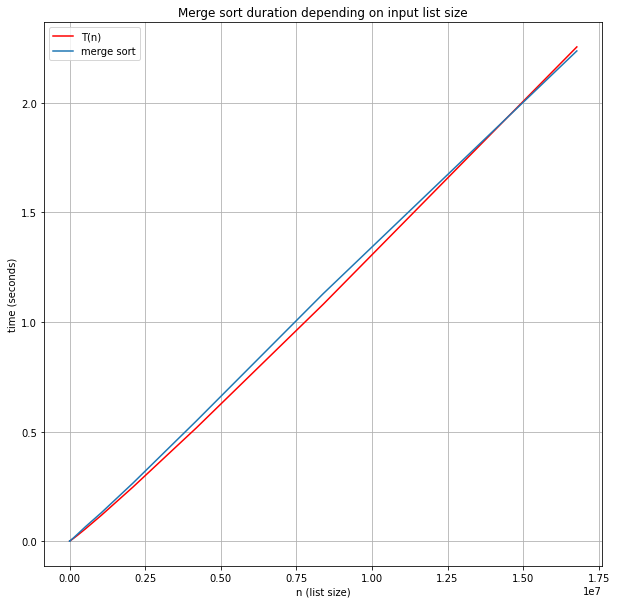

In [17]:
nlogn = [56e-10 * n * np.log2(n) for n in list_lengths]

plt.plot(list_lengths, nlogn, 'r', label='T(n)')
plt.plot(list_lengths, benchmark_times, label='merge sort')
plt.legend()
plt.grid(True)
plt.xlabel('n (list size)')
plt.ylabel('time (seconds)')
plt.title('Merge sort duration depending on input list size')

plt.show()

Let's see how many integers can my laptop sort in 1 minute. After the series of experiments we end up with 250 million numbers.

In [19]:
elapsed = 0
list_size = 250_000_000

cur_list = generate_random_list(list_size, -100, 100)
start = timer()
mergesort(cur_list)
end = timer()
elapsed = end - start

print(f"The sorting of {list_size} numbers has taken {elapsed} seconds.")

The sorting of 250000000 numbers has taken 56.28055489999997 seconds.


Let's predict what would the sorting time be if we increase N 100 or 1000 times. For this, we substitute N into the approximating function $T(n)$ found earlier.

$T(25 * 10^9) = 56 * 10^{-10} * 25 * 10^9 * log(25 * 10^9) = 4830s = 1h 20m 30s $
$T(25 * 10^{10}) = 56 * 10^{-10} * 25 * 10^{10} * log(25 * 10^{10}) = 53060s = 14h 44m 20s$

### Interpretation of results

We analysed numpy's merge sort and found an approximating function $T(n)$ thanks to the fact that the algorithm's time complexity is $\Theta(n * log(n))$. Then using $T(n)$ we managed to predict the sorting time for big values of N. It was discovered that sorting 250 billion numbers times probably takes 14 hours on my laptop. The result seems realistic.

## Exercise 5

### Assignment

$f(n) = 3n^4 + n$ and $g(n) = n^4 + n^2$. Prove that $f(n) = \Theta(g(n))$ by finding suitable $c_1$, $c_2$ and $n_0$.

### Solution

Let's find intersections of the functions. Equation $f(n) - g(n) = 2n^4 - n^2 + n = 0$ has two integer roots: $n_1 = -1$, $n_2 = 0$. For every $n$ after $n_{low} = 0$, $f(n) > g(n)$. Therefore in this case $g(n)$ is a lower bound of $f(n)$ with coefficient $c_1 = 1$. Let's assume that $c_2 = 3$. Then the intersection of the functions is set by equation $f(n) - 3g(n) = -3n^2 + n = 0$. The roots are $0$ and $1/3$. The least integer $n_{up}$ after which $f(n) < g(n)$ is $1$. Finally, we choose $n_0 = max(n_{low}, n_{up}) = 1$, $c_1 = 1$ and $c_2 = 3$. Let's build a corresponding plot.

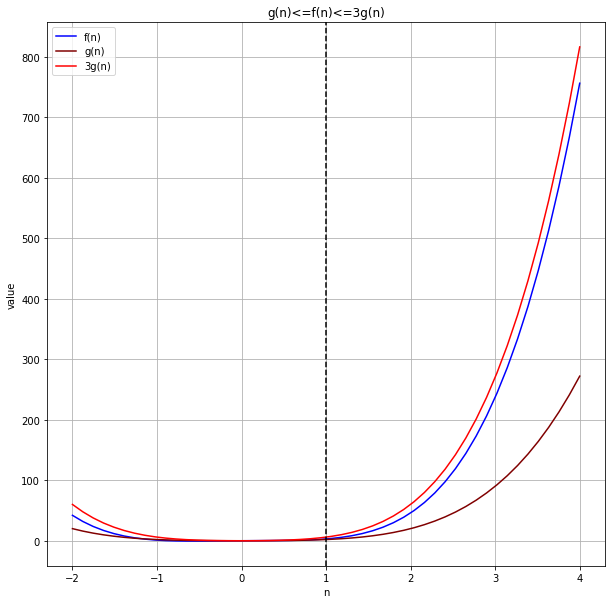

In [35]:
n = np.linspace(-2, 4, 50)
f = 3 * n**4 - n**2 + n
g_lower = n**4 + n**2
g_upper = 3 * (n**4 + n**2)

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(n, f, 'blue', label='f(n)')
plt.plot(n, g_lower, 'maroon', label='g(n)')
plt.plot(n, g_upper, 'red', label='3g(n)')
plt.axvline(x=1, c='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.xlabel('n')
plt.ylabel('value')
plt.title('g(n)<=f(n)<=3g(n)')

plt.show()

To see more clearly that $f(n)$ is bounded by $g(n)$, let's choose $c_2 = 10$.

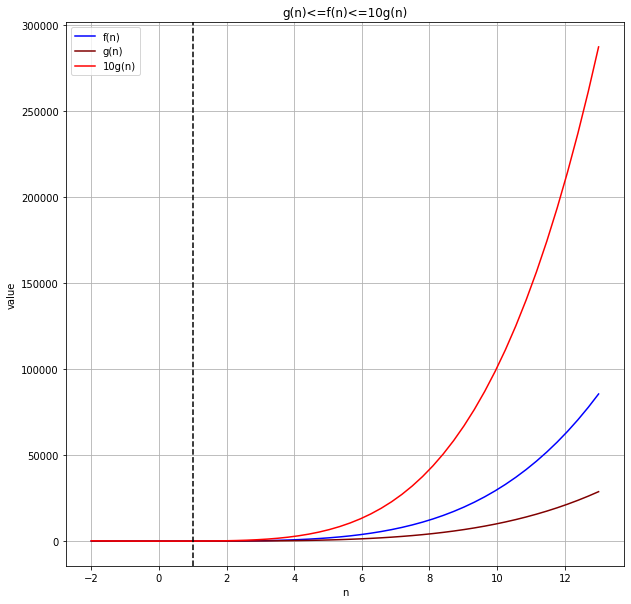

In [36]:
n = np.linspace(-2, 13, 50)
f = 3 * n**4 - n**2 + n
g_lower = n**4 + n**2
g_upper = 10 * (n**4 + n**2)

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(n, f, 'blue', label='f(n)')
plt.plot(n, g_lower, 'maroon', label='g(n)')
plt.plot(n, g_upper, 'red', label='10g(n)')
plt.axvline(x=1, c='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.xlabel('n')
plt.ylabel('value')
plt.title('g(n)<=f(n)<=10g(n)')

plt.show()

### Interpretation of results

It was formally and graphically proven that $f(n) = \Theta(g(n))$.

## Exercise 6

### Assignment

Make an inefficient randomized sorting algorithm that permutes the input and tests if it is sorted. Keep permuting until one of the random permutations is sorted. For how large N it is already infeasible to test all permutations on your laptop? How to create one random permutation of N values (i.e. how to scramble fully the ordered input)?

### Solution

For random shuffling we will use the Fisher-Yates algorithm. It traverses the array from the end to the beginning and keeps swapping elements on its way with unvisited elements under some randomly generated index. As a result, we have an unbiased permutation, where each permutation is equally possible.

In [31]:
def shuffle(array):
    """
    Fisher-Yates algorithms for random shuffling arrays
    """
    n = len(array)
    
    for i in range(n - 1, 0, -1):
        j = randint(0, i)
        array[i], array[j] = array[j], array[i]
        
    return array

In [32]:
def is_sorted(array):
    """
    Check if array is sorted
    """
    return all(array[i] <= array[i+1] for i in range(len(array) - 1))

In [33]:
def random_sort(array):
    """
    Algorithm that keeps permuting an array until it is sorted
    """
    while not is_sorted(array):
        shuffle(array)
        
    return array

Let's try to sort some short list.

In [34]:
# 10! = 3 628 800 possible permutations
test_list = [6, 3, 5, 8, 1, 0, 7, 2, 4, 9]

start = timer()
random_sort(test_list)
end = timer()
elapsed = end - start

print(test_list)
print(f"Elapsed time: {elapsed} seconds.")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Elapsed time: 1.5672219999996742 seconds.


After some experiments we find out that sorting the list of 12 numbers is not feasible in 5 minutes (the time I was ready to wait).